In [2]:
# Import our dependencies
%matplotlib inline
import pandas as pd
import matplotlib as plt
from sklearn.datasets import make_blobs
import sklearn as skl
import tensorflow as tf

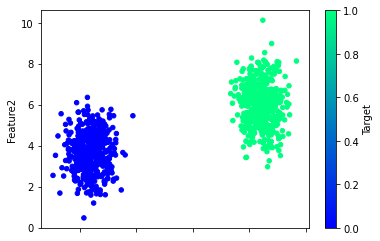

In [3]:
#Generate dummy dataset

X, y = make_blobs(n_samples=1000, centers=2, n_features=2,random_state=78)


#Creating a DataFrame with the dummy data

df = pd.DataFrame(X, columns = ['Feature1', 'Feature2'])

df['Target'] = y 

# Plotting the dummy data

df.plot.scatter(x='Feature1', y= 'Feature2', c='Target', colormap='winter')

In [4]:
# Use sklearn to split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [5]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [6]:
#create the Keras Sequential model

nn_model = tf.keras.models.Sequential()


In [7]:
#add our first Dense Layer, including the input layer

nn_model.add(tf.keras.layers.Dense(units=1, activation='relu', input_dim=2))



In [8]:
#add the putput layer that uses a probability activation function

nn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [9]:
#Check the structure of the sequential model

nn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 3         
                                                                 
 dense_1 (Dense)             (None, 1)                 2         
                                                                 
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Compile the Sequential model together and customize metrics
nn_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
#Fit the model to the training data

fit_model = nn_model.fit(X_train_scaled, y_train, epochs = 100)



Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.5839 - accuracy: 0.9733
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5686 - accuracy: 0.9840
Epoch 3/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5527 - accuracy: 0.9933
Epoch 4/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5367 - accuracy: 0.9960
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5207 - accuracy: 0.9987
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5049 - accuracy: 1.0000
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 1.0000
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4739 - accuracy: 1.0000
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 1.0000
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4443 - accuracy: 1.0000
Epoch 11/

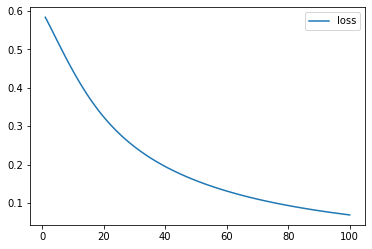

In [12]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

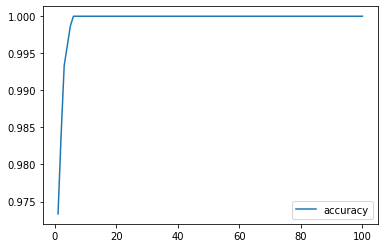

In [13]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [14]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

8/8 - 0s - loss: 0.0649 - accuracy: 1.0000 - 158ms/epoch - 20ms/step
Loss: 0.06491539627313614, Accuracy: 1.0


In [15]:
# Predict the classification of a new set of blob data
new_X, new_Y = make_blobs(n_samples=10, centers=2, n_features=2, random_state=78)
new_X_scaled = X_scaler.transform(new_X)
(nn_model.predict(new_X_scaled) > 0.5).astype("int32")

1/1 [==============================] - 0s 86ms/step


array([[0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int32)

# **NONLINEAR DATA**

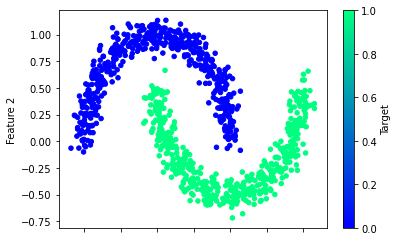

In [16]:
from sklearn.datasets import make_moons

# Creating dummy nonlinear data
X_moons, y_moons = make_moons(n_samples=1000, noise=0.08, random_state=78)

# Transforming y_moons to a vertical vector
y_moons = y_moons.reshape(-1, 1)

# Creating a DataFrame to plot the nonlinear dummy data
df_moons = pd.DataFrame(X_moons, columns=["Feature 1", "Feature 2"])
df_moons["Target"] = y_moons

# Plot the nonlinear dummy data
df_moons.plot.scatter(x="Feature 1",y="Feature 2", c="Target",colormap="winter")

In [17]:
# Create training and testing sets
X_moon_train, X_moon_test, y_moon_train, y_moon_test = train_test_split(
    X_moons, y_moons, random_state=78
)

# Create the scaler instance
X_moon_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_moon_scaler.fit(X_moon_train)

# Scale the data
X_moon_train_scaled = X_moon_scaler.transform(X_moon_train)
X_moon_test_scaled = X_moon_scaler.transform(X_moon_test)

In [18]:
# Training the model with the nonlinear data
model_moon = nn_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.8612 - accuracy: 0.5747
Epoch 2/100
24/24 [==============================] - 0s 2ms/step - loss: 0.7579 - accuracy: 0.6093
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6838 - accuracy: 0.6400
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6350 - accuracy: 0.6560
Epoch 5/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5978 - accuracy: 0.6680
Epoch 6/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.6853
Epoch 7/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5429 - accuracy: 0.6907
Epoch 8/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5215 - accuracy: 0.7040
Epoch 9/100
24/24 [==============================] - 0s 2ms/step - loss: 0.5030 - accuracy: 0.7133
Epoch 10/100
24/24 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7253
Epoch 11/

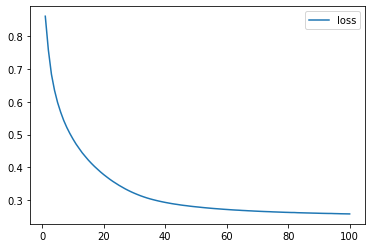

In [19]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(model_moon.history, index=range(1,len(model_moon.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

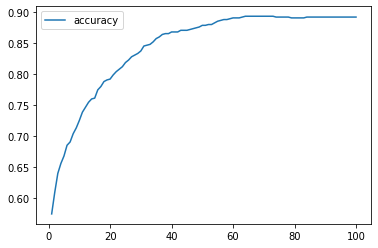

In [20]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [21]:
#Generatee sequential model

new_model = tf.keras.models.Sequential()



In [25]:
# add the input and hidden. layer

number_inputs = 2
number_hidden_nodes = 6

new_model.add(tf.keras.layers.Dense(units=number_hidden_nodes, activation='relu', input_dim= number_inputs))

# Add the output layer that uses a probability activation function
new_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [26]:
# Compile the Sequential model together and customize metrics
new_model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Fit the model to the training data
new_fit_model = new_model.fit(X_moon_train_scaled, y_moon_train, epochs=100, shuffle=True)

Epoch 1/100
24/24 [==============================] - 1s 2ms/step - loss: 0.7560 - accuracy: 0.2560
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.7152 - accuracy: 0.2347
Epoch 3/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6923 - accuracy: 0.4507
Epoch 4/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6906 - accuracy: 0.5307
Epoch 5/100
24/24 [==============================] - 0s 4ms/step - loss: 0.6889 - accuracy: 0.5307
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.6813 - accuracy: 0.5307
Epoch 7/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6721 - accuracy: 0.5307
Epoch 8/100
24/24 [==============================] - 0s 5ms/step - loss: 0.6628 - accuracy: 0.5307
Epoch 9/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6534 - accuracy: 0.5307
Epoch 10/100
24/24 [==============================] - 0s 6ms/step - loss: 0.6429 - accuracy: 0.5307
Epoch 11/